In [1]:
!pip install --upgrade -q scikit-learn pycaret xgboost autoviz lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.4 MB/s eta 0:00:00
  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
# Read in training data

import pandas as pd

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/122kxiprQhzR123mGnyGxSERg854FmbBF/view?usp=sharing"

# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df.head())

   age   sex      bmi   children smoker   region      charges  
0  19   female  27.900      0      yes   southwest  16884.92400
1  18     male  33.770      1       no   southeast   1725.55230
2  28     male  33.000      3       no   southeast   4449.46200
3  33     male  22.705      0       no   northwest  21984.47061
4  32     male  28.880      0       no   northwest   3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Read in test data

import pandas as pd

# Replace with your Google Drive shareable link
drive_url = "https://drive.google.com/file/d/1qZIgsTvpF4acFXosreetuGZyYaOjhSgM/view?usp=sharing"
# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df_test = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df_test.head())


   age  sex     bmi     children  smoker  region
0  58    0   30.338722      0        0       1  
1  60    0   24.324606      0        0       0  
2  27    0   18.228846      3        0       1  
3  24    0   40.426077      0        1       2  
4  19    0   35.872515      0        0       0  


Shape of your Data Set loaded: (1338, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 1 dupli

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,3,18.000000,64.000000,No issue
sex,object,0.000000,0,,,No issue
bmi,float64,0.000000,NA,15.960000,53.130000,Column has 9 outliers greater than upper bound (47.32) or lower than lower bound(13.67). Cap them or remove them.
children,int64,0.000000,0,0.000000,5.000000,No issue
smoker,object,0.000000,0,,,No issue
region,object,0.000000,0,,,No issue
charges,float64,0.000000,NA,1121.873900,63770.428010,Column has 139 outliers greater than upper bound (34524.78) or lower than lower bound(-13120.72). Cap them or remove them.


Number of All Scatter Plots = 3


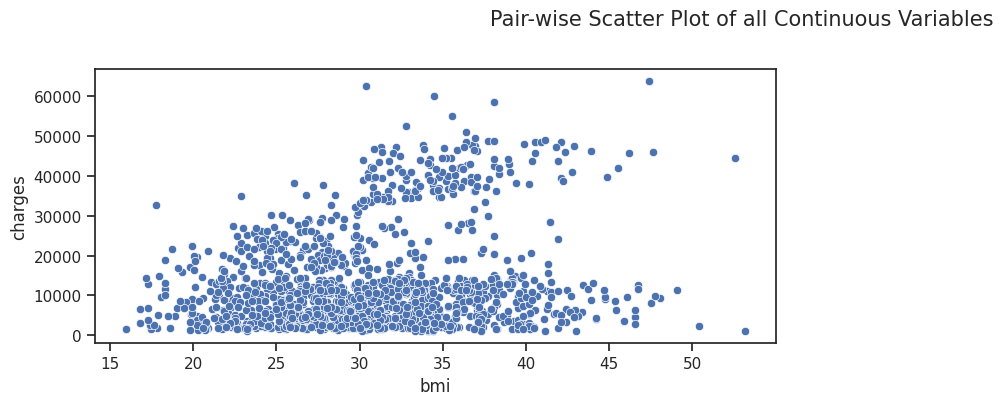

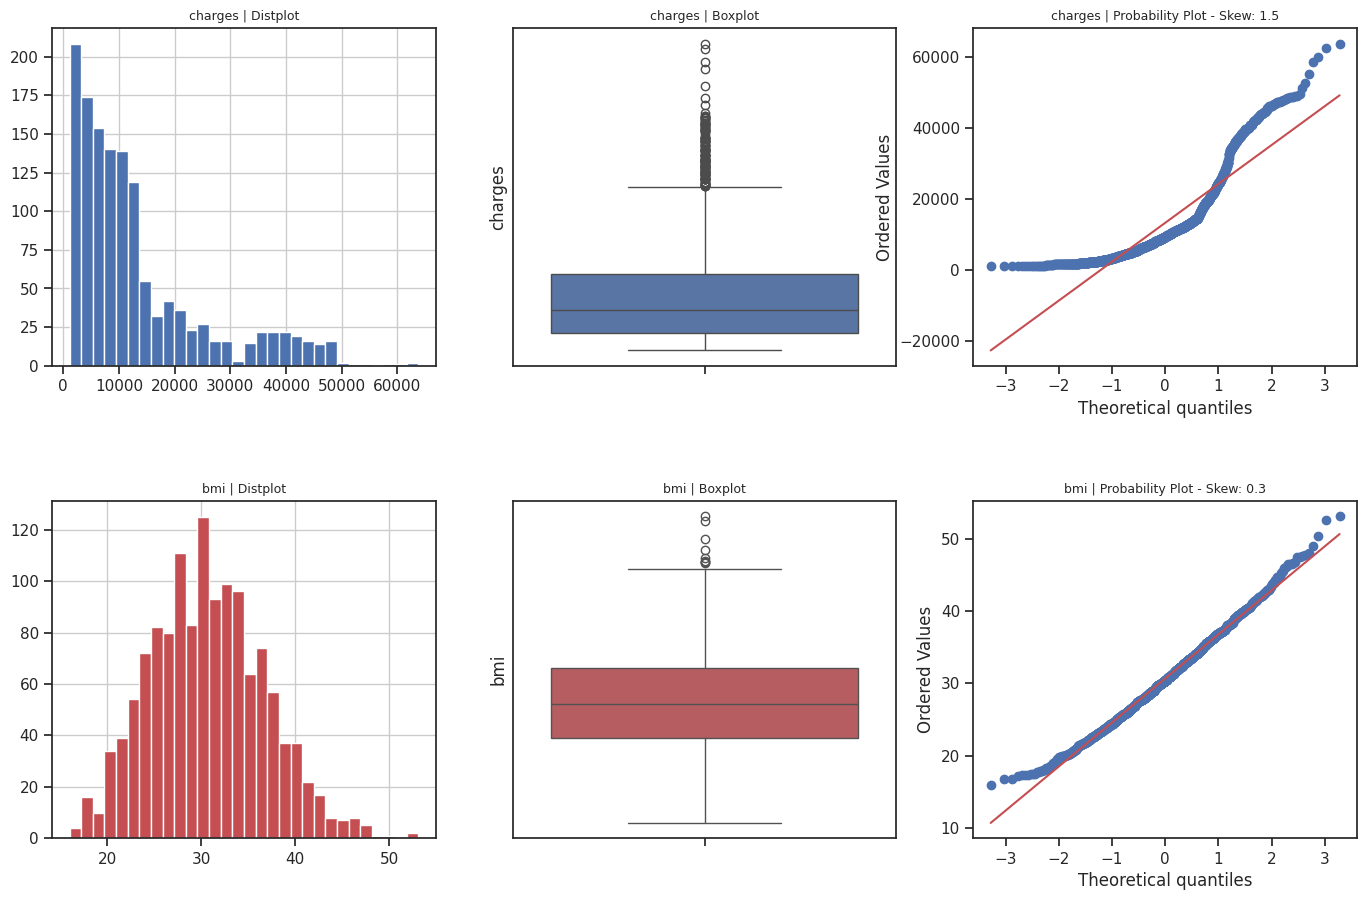

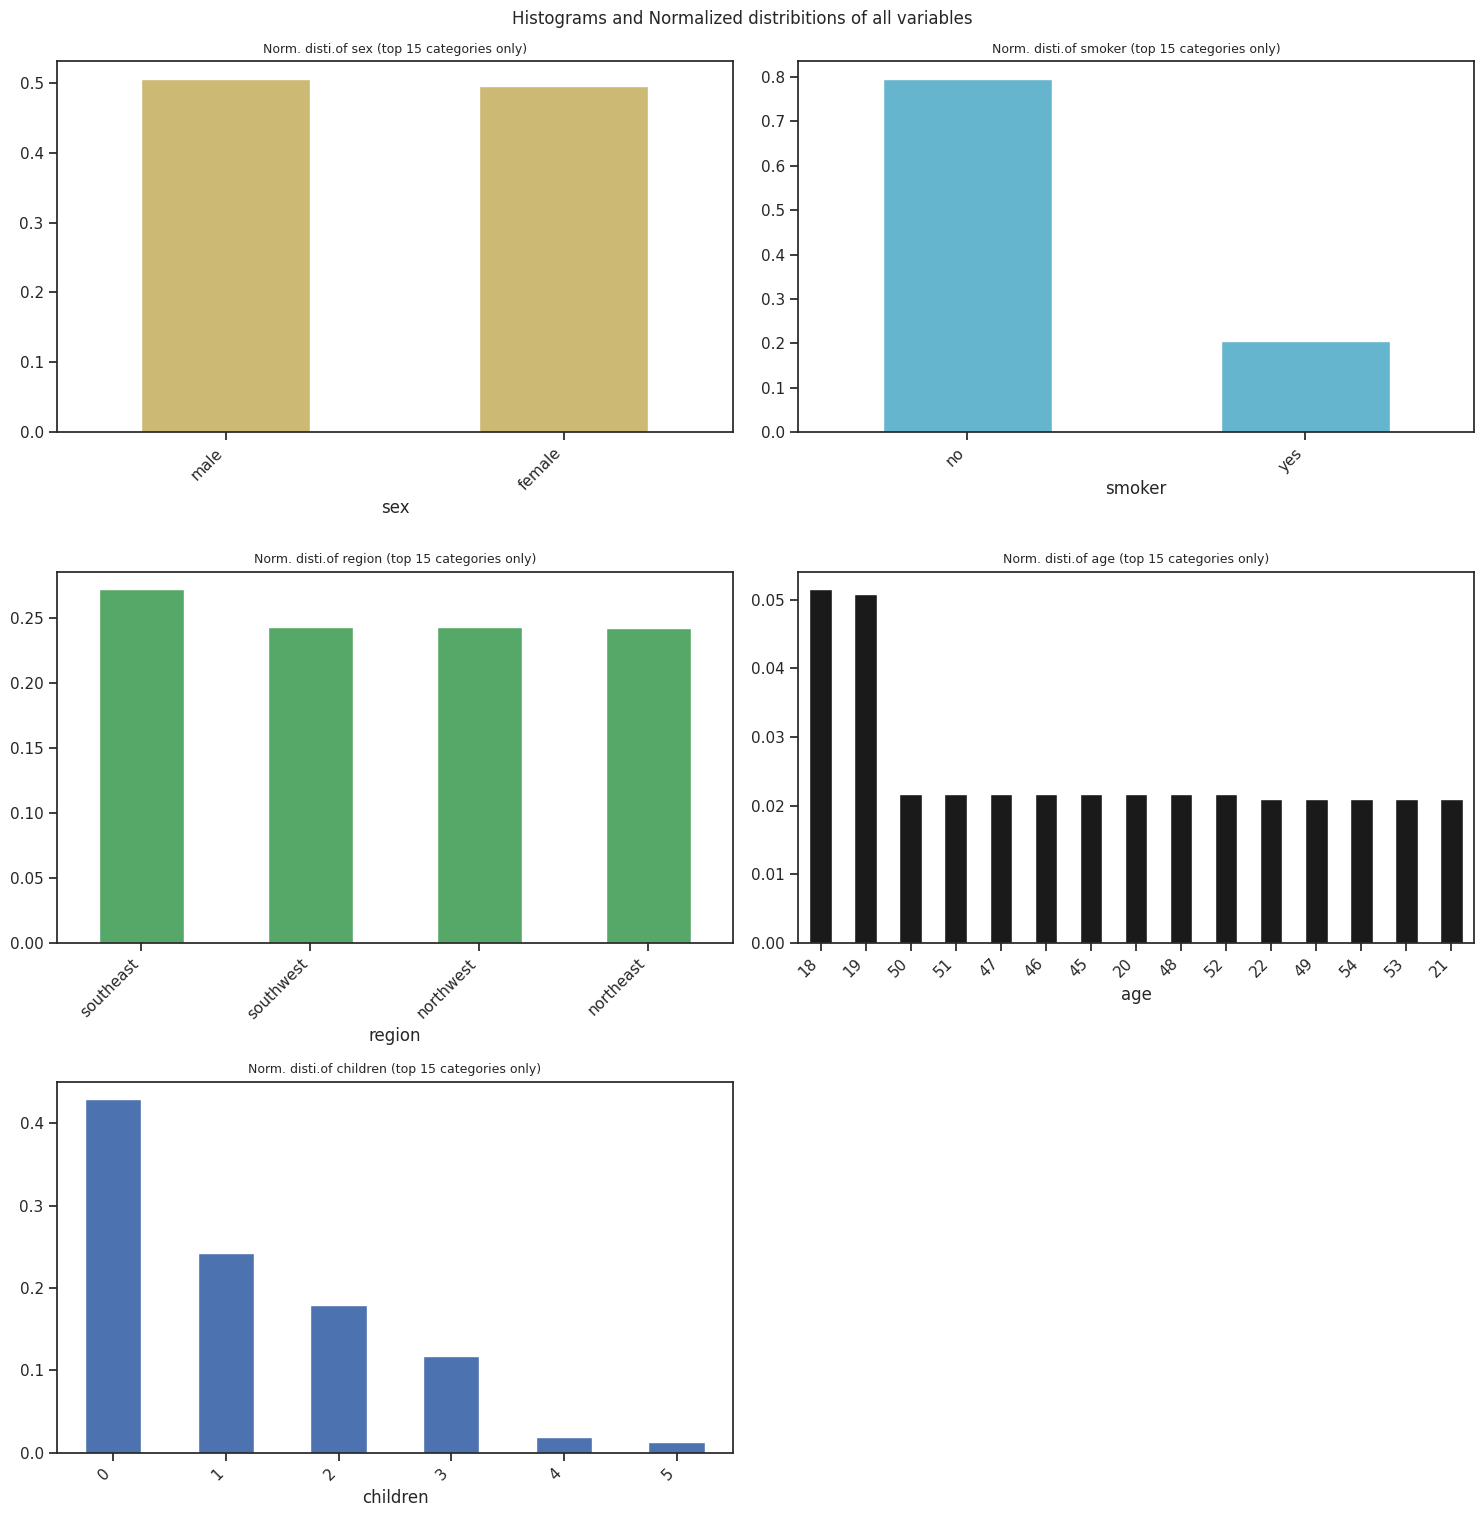

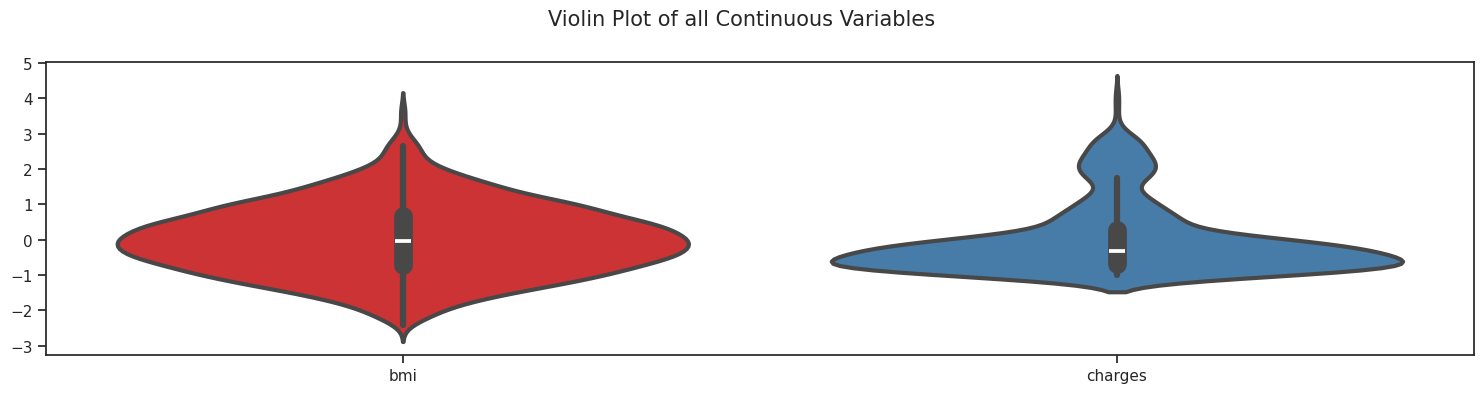

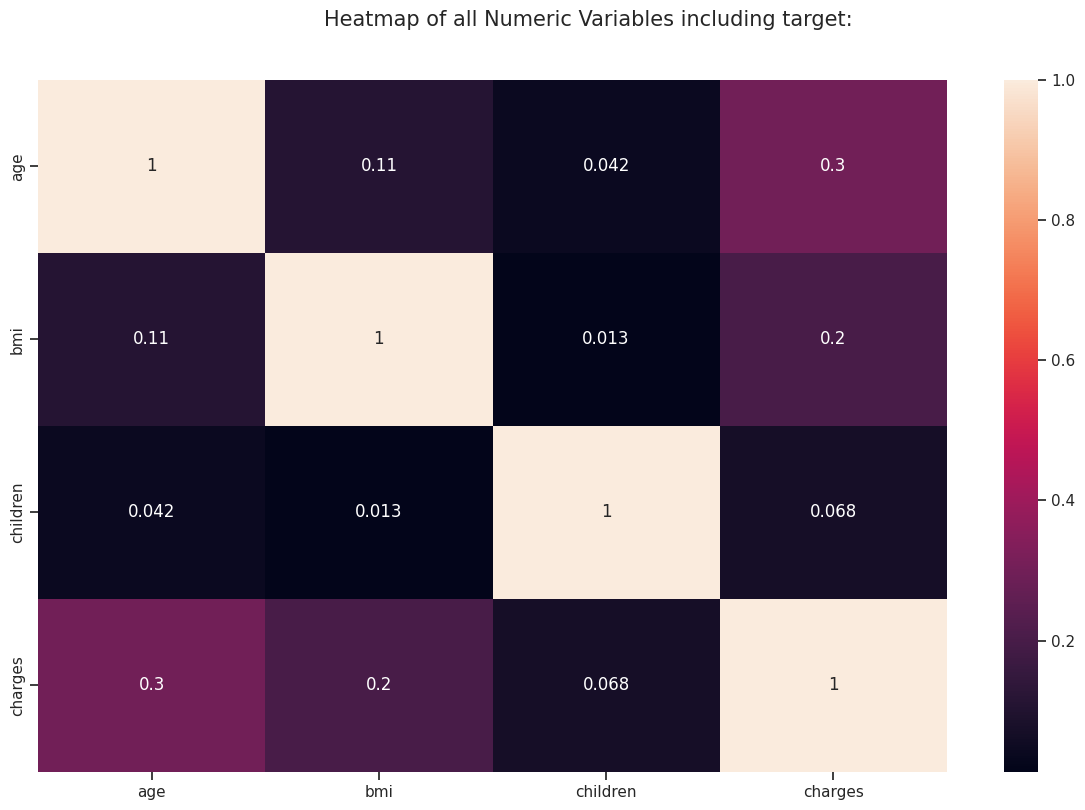

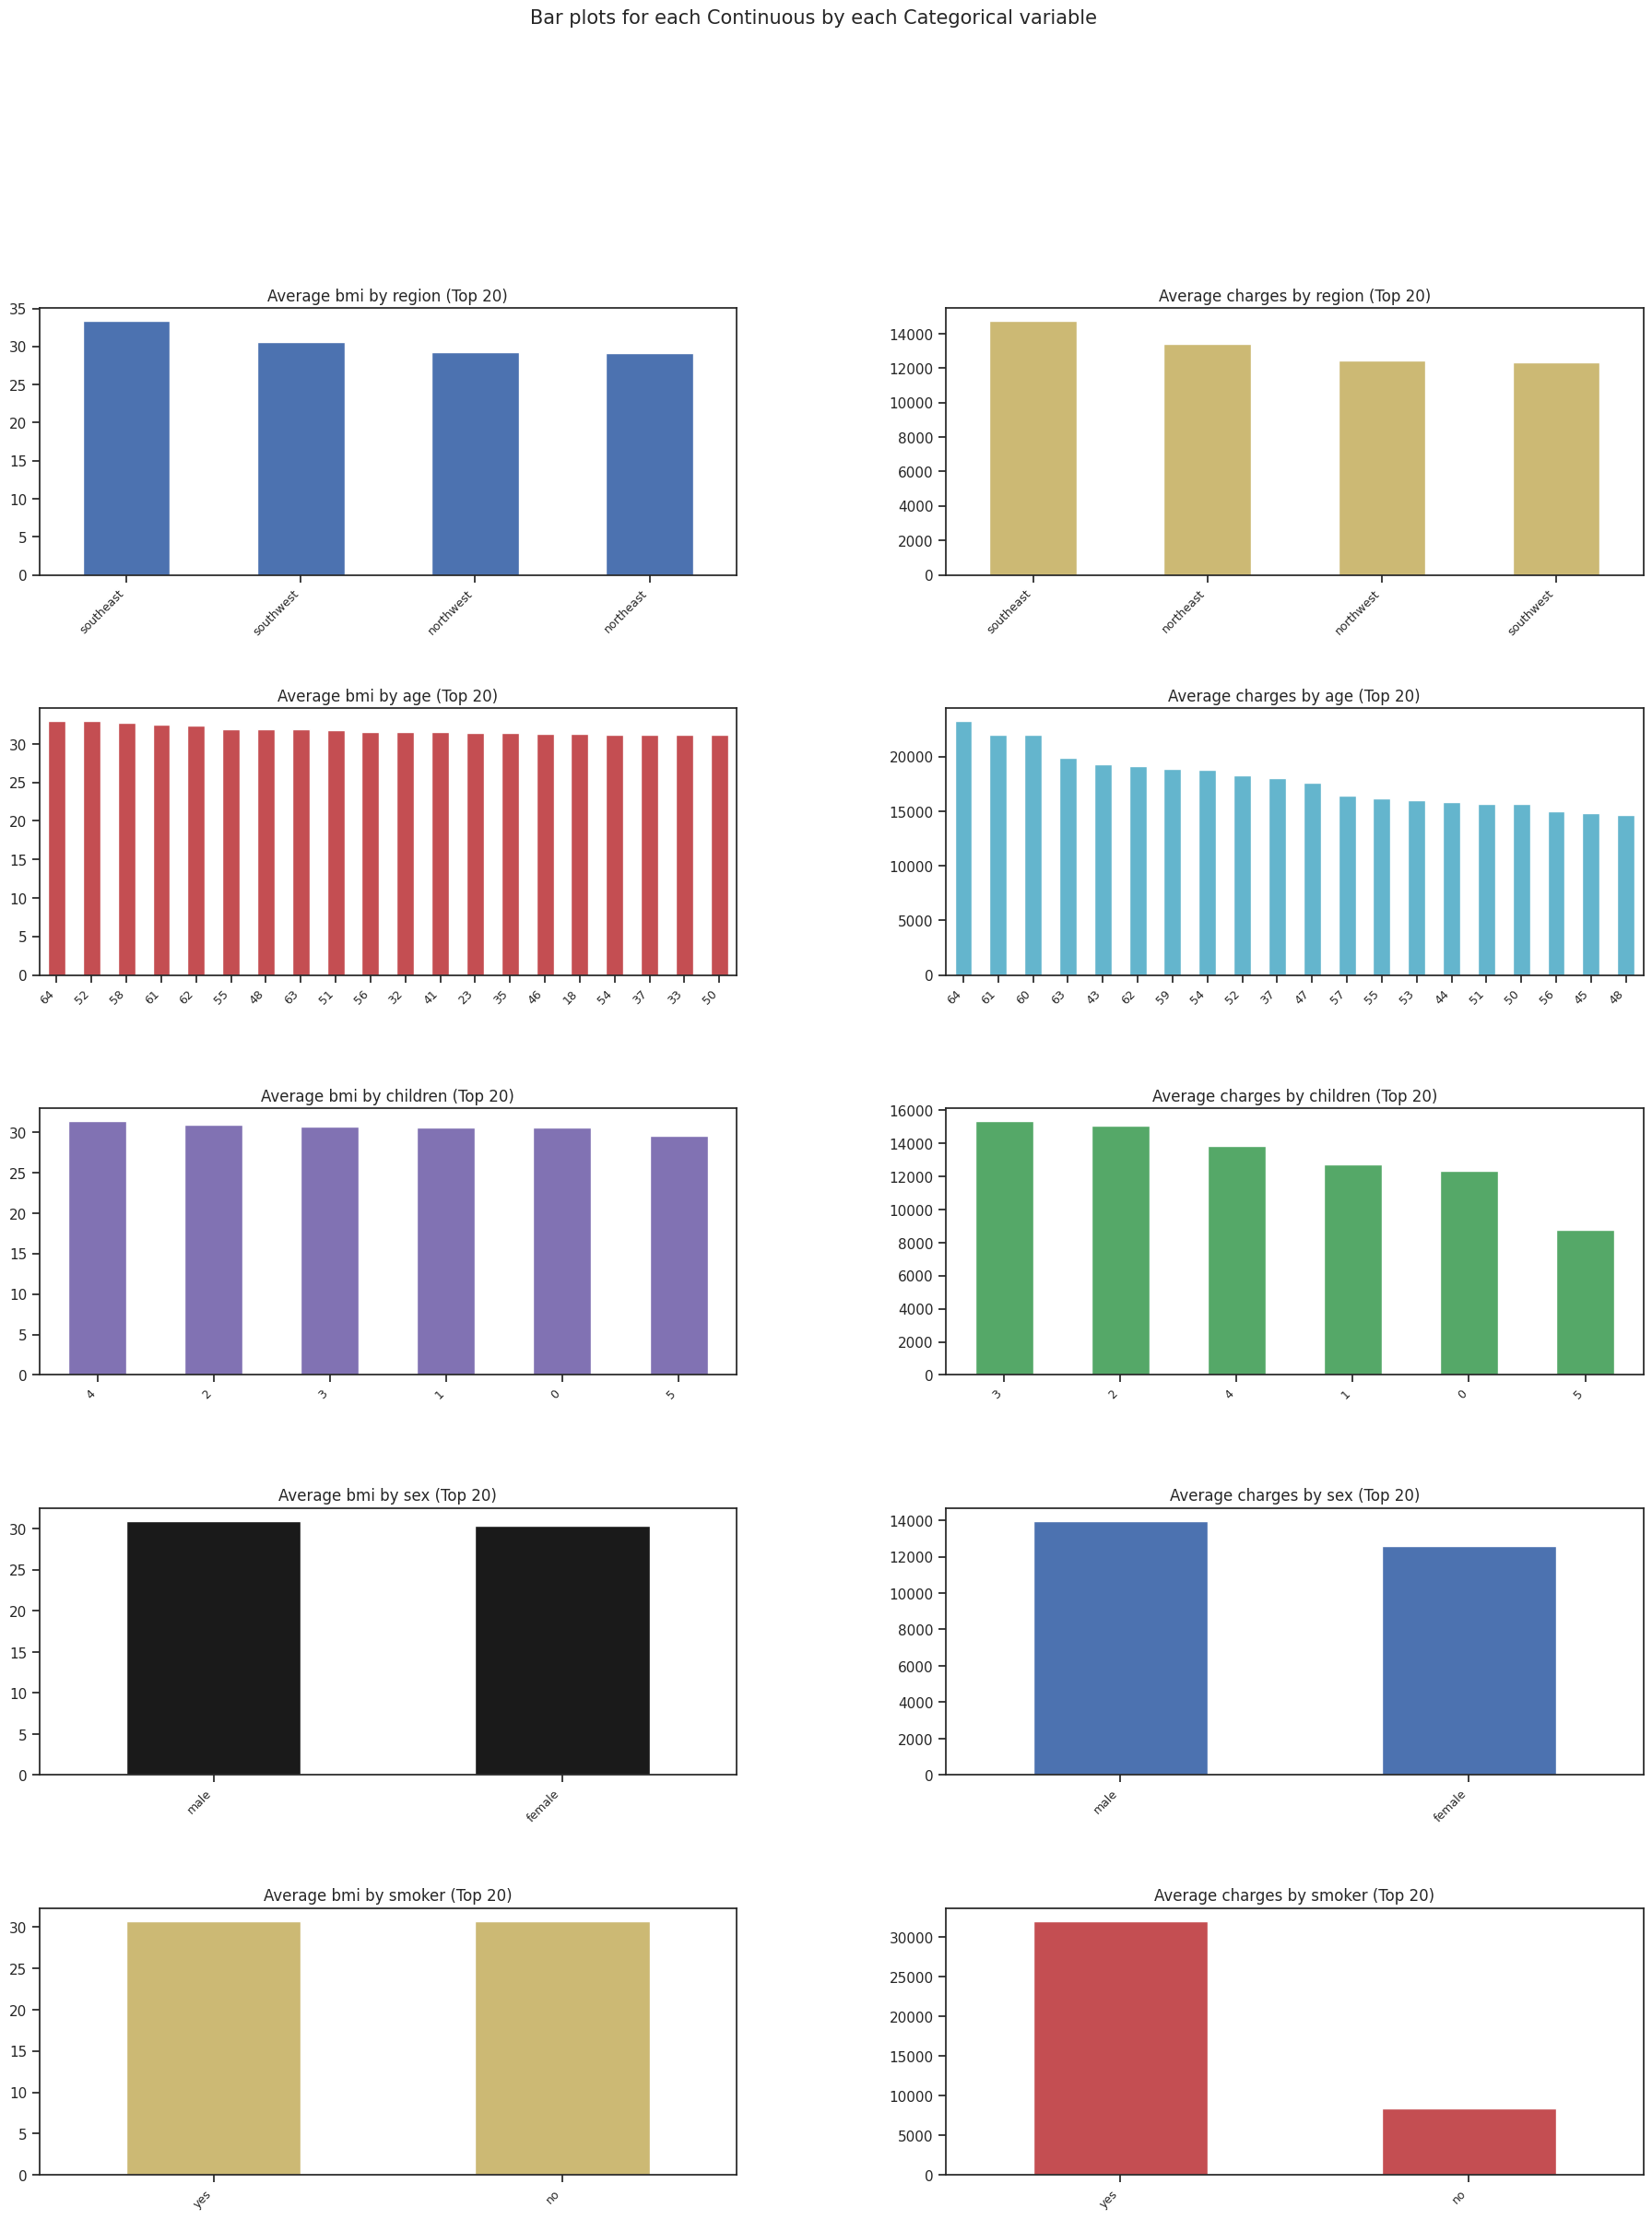

All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [6]:
# create an AutoViz class
AV = AutoViz_Class()
# create charts
%matplotlib inline
dftc = AV.AutoViz(filename='', sep ='', dfte = df, header = 0,
verbose = 1, lowess = False, chart_format ='png', max_rows_analyzed = 2000, max_cols_analyzed = 30)

In [7]:
# Insert code blocks for engineering below
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df['region'] = df['region'].map({'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [9]:
X = pd.DataFrame(df.drop(['charges'], axis=1))
y = pd.DataFrame(np.log1p(df['charges']))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Shape of X and y',
      X.shape, y.shape,
      '\nShape of training set X and y',
      X_train.shape, y_train.shape,
      '\nShape of test set X and y',
      X_test.shape, y_test.shape)

Shape of X and y (1338, 6) (1338, 1) 
Shape of training set X and y (1070, 6) (1070, 1) 
Shape of test set X and y (268, 6) (268, 1)


In [11]:
from sklearn.preprocessing import StandardScaler

stdsc1 = StandardScaler()
X_train_std = stdsc1.fit_transform(X_train)
X_test_std = stdsc1.transform(X_test)
df_test_std = stdsc1.transform(df_test)

stdsc2 = StandardScaler()
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

Random Forest MSE (Standardized): 0.12577709654764135
Random Forest MSE (Log Transformed): 0.10638762043822028
Random Forest MSE: 15981573.141824562


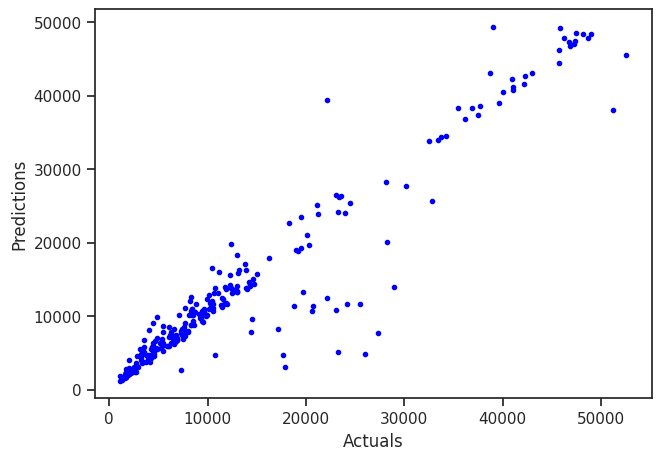

In [12]:
# Insert code blocks for regerssor(s) below
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def PredsVsActuals(actuals, predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predictions')
  plt.show()

rfr = RandomForestRegressor()
rfr.fit(X_train_std, y_train_std)

y_pred_std = rfr.predict(X_test_std)
print(f'Random Forest MSE (Standardized): {mean_squared_error(y_test_std, y_pred_std)}')

y_pred = stdsc2.inverse_transform(pd.DataFrame(y_pred_std))
print(f'Random Forest MSE (Log Transformed): {mean_squared_error(y_test, y_pred)}')

y_pred_real = np.expm1(y_pred)
y_test_real = np.expm1(y_test)
print(f'Random Forest MSE: {mean_squared_error(y_test_real, y_pred_real)}')

PredsVsActuals(y_test_real, y_pred_real)

XGBoost MSE (Standardized): 0.20742808639764448
XGBoost MSE: 0.17545152103049894
XGBoost MSE: 27096111.417770427


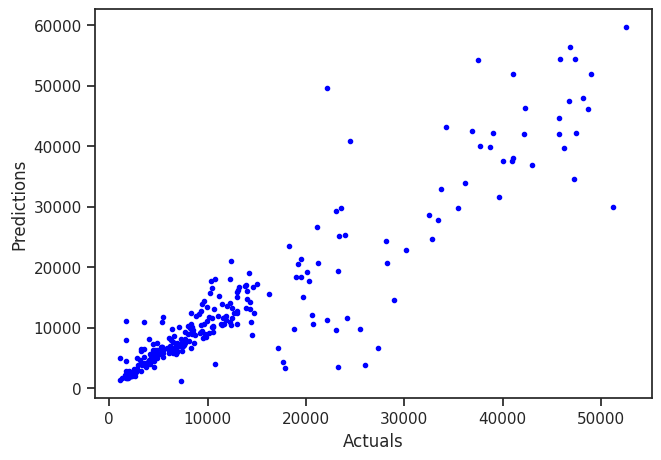

In [13]:
from xgboost import XGBRegressor

xgr = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgr.fit(X_train_std, y_train_std)

y_pred_std = xgr.predict(X_test_std)
print(f'XGBoost MSE (Standardized): {mean_squared_error(y_test_std, y_pred_std)}')

y_pred = stdsc2.inverse_transform(pd.DataFrame(y_pred_std))
print(f'XGBoost MSE: {mean_squared_error(y_test, y_pred)}')

y_pred_real = np.expm1(y_pred)
y_test_real = np.expm1(y_test)
print(f'XGBoost MSE: {mean_squared_error(y_test_real, y_pred_real)}')

PredsVsActuals(y_test_real, y_pred_real)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

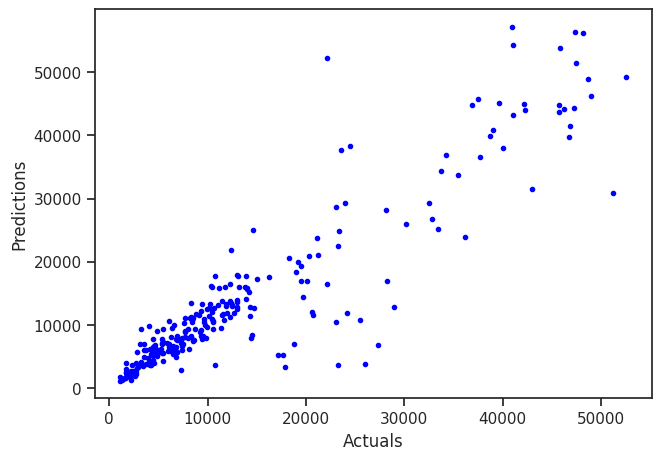

In [14]:
from lightgbm import LGBMRegressor

lgr = LGBMRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
lgr.fit(X_train_std, y_train_std)

y_pred_std = lgr.predict(X_test_std)
print(f'LightGBM MSE (Standardized): {mean_squared_error(y_test_std, y_pred_std)}')

y_pred = stdsc2.inverse_transform(pd.DataFrame(y_pred_std))
print(f'LightGBM MSE: {mean_squared_error(y_test, y_pred)}')

y_pred_real = np.expm1(y_pred)
y_test_real = np.expm1(y_test)
print(f'LightGBM MSE: {mean_squared_error(y_test_real, y_pred_real)}')

PredsVsActuals(y_test_real, y_pred_real)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 6
[LightGBM] [Info] Start training from score 0.009765
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

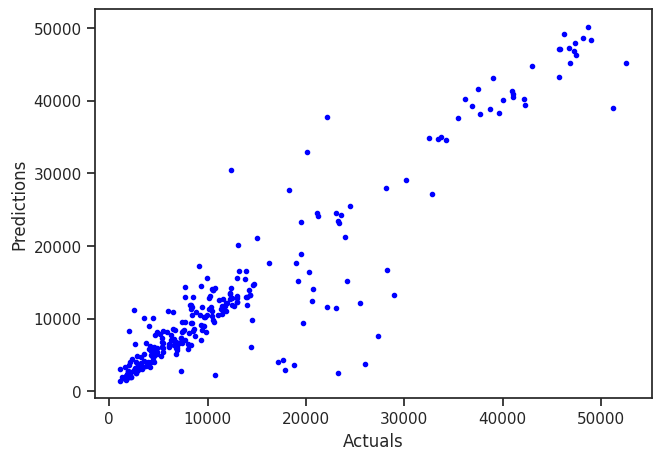

In [15]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rfr', RandomForestRegressor()),
    ('xgr', XGBRegressor()),
    ('lgr', LGBMRegressor())
    ]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10, random_state=42)
    )

reg.fit(X_train_std, y_train_std)

y_pred_std = reg.predict(X_test_std)
print(f'Stacking MSE (Standardized): {mean_squared_error(y_test_std, y_pred_std)}')

y_pred = stdsc2.inverse_transform(pd.DataFrame(y_pred_std))
print(f'Stacking MSE: {mean_squared_error(y_test, y_pred)}')

y_pred_real = np.expm1(y_pred)
y_test_real = np.expm1(y_test)
print(f'Stacking MSE: {mean_squared_error(y_test_real, y_pred_real)}')

PredsVsActuals(y_test_real, y_pred_real)

In [16]:
final_model = rfr

In [17]:
# Create submit.csv on local drive for submission to Kaggle competition

import pandas as pd

# Assuming final_model is your trained model and X_test is your test dataset
# Generate predictions
predictions_std = final_model.predict(df_test)
predictions = stdsc2.inverse_transform(pd.DataFrame(predictions_std)).flatten()
predictions = np.expm1(predictions)

# Create a DataFrame with ID and TARGET columns
submission_df = pd.DataFrame({
    'ID': range(1, len(df_test) + 1),
    'TARGET': predictions
})

# Save to submit.csv
submission_df.to_csv('submit.csv', index=False)

print("submit.csv file created successfully!")

# # Download the CSV file to local machine
# files.download('submit.csv')



submit.csv file created successfully!
